# Product Ratings Prediction

After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps like,

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

Column Information:

- Review_title : title of the review
- Review_text : content of the review text
- Ratings : ratings are out of 5 stars

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing NLP libraries:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

# Importing warnings:
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset:

In [2]:
df=pd.read_excel(r"Ratings_Dataset.xlsx")
df

,Unnamed: 0,Ratings,Review_Text,Summary
0,0,5,"Amazing product in price range , good sound qu...",Fabulous!
1,1,3,Good,Nice
2,2,5,Thank you flipkart for thiz amazing product..d...,Simply awesome
3,3,5,Good,Terrific purchase
4,4,5,Awesome Product.,Simply awesome
...,...,...,...,...
17192,13581,5,The camera is really budjet friendly\nThe qual...,Amazon delivered this product just in one day ...
17193,13582,5,"Price, video quality is best in budget company...",Nice product
17194,13583,5,Value for money product. Very good stabilizati...,Smooth ... Feel standard
17195,13584,5,Play Video\n Pro's:\n1. Good clarity consideri...,Osm


In [3]:
## Checking the shape of our dataset:
df.shape

(17197, 4)

We have 17197 records and 4 columns including target variable.

## EDA - Exploratory Data Analysis

As we can see that 'Unnamed:0' column present in our dataset, which will be a kind of serial no. so it will not add any value in our model. So we will drop it right now.

In [4]:
df.drop(columns = 'Unnamed: 0', inplace = True)

### Checking Missing Values:

In [5]:
df.isna().sum()

Ratings          0
Review_Text    274
Summary          0
dtype: int64

- There are some features having missing values. As we see that the number of missing values are too low.
- So it is good to fill them we will drop them, as it will not effect our dataset.

In [6]:
## Droppping Nans
df.dropna(inplace=True)
df.shape

(16923, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16923 entries, 0 to 17196
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      16923 non-null  int64 
 1   Review_Text  16923 non-null  object
 2   Summary      16923 non-null  object
dtypes: int64(1), object(2)
memory usage: 528.8+ KB


- There are no null values present in our dataset.
- Our target variable i.e. 'Ratings' is Integer datatype, and other both variables is text data type.

In [8]:
df['Ratings'].unique()

array([5, 3, 1, 4, 2], dtype=int64)

As we can see at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)

In [9]:
df['Ratings'].value_counts()

5    6307
4    4388
1    3773
2    2212
3     243
Name: Ratings, dtype: int64

#### Now combining the "Review_title" and "Review_text" columns into one single column called "Review"

In [10]:
df['Full_Review'] = df['Summary'].map(str)+' '+df['Review_Text']
df

,Ratings,Review_Text,Summary,Full_Review
0,5,"Amazing product in price range , good sound qu...",Fabulous!,"Fabulous! Amazing product in price range , goo..."
1,3,Good,Nice,Nice Good
2,5,Thank you flipkart for thiz amazing product..d...,Simply awesome,Simply awesome Thank you flipkart for thiz ama...
3,5,Good,Terrific purchase,Terrific purchase Good
4,5,Awesome Product.,Simply awesome,Simply awesome Awesome Product.
...,...,...,...,...
17192,5,The camera is really budjet friendly\nThe qual...,Amazon delivered this product just in one day ...,Amazon delivered this product just in one day ...
17193,5,"Price, video quality is best in budget company...",Nice product,"Nice product Price, video quality is best in b..."
17194,5,Value for money product. Very good stabilizati...,Smooth ... Feel standard,Smooth ... Feel standard Value for money produ...
17195,5,Play Video\n Pro's:\n1. Good clarity consideri...,Osm,Osm Play Video\n Pro's:\n1. Good clarity consi...


#### Now we will check the first 10 Full review and understand the structure and overview of reviews...

In [11]:
for i in range(10):
    print(df.Full_Review[i])
    print("\n**********Next Review*********\n") 

Fabulous! Amazing product in price range , good sound quality , performance is so better , you can update windows 11 , display is normal( TN LED) but no problem as price range , 4gb ram, 256gb SSD but you can upgrade to 8gb 512 gb

**********Next Review*********

Nice Good

**********Next Review*********

Simply awesome Thank you flipkart for thiz amazing product..delivery time is perfect...laptop is also amazing

**********Next Review*********

Terrific purchase Good

**********Next Review*********

Simply awesome Awesome Product.

**********Next Review*********

Not recommended at all Heating issue

**********Next Review*********

Best in the market! Good product

**********Next Review*********

Classy product Awesome

**********Next Review*********

Terrific purchase Thank u flipkart delivery

**********Next Review*********

Worth the money Very good laptop

**********Next Review*********



- We can see that our reviews holds many emojies, our model will not understand to these emojies so we have to handle them.
- There are many special character used like -,:,:,...,@,(,) etc.
- Some words are in Capital letters and some are small letters.

### Removing Emojies


In [12]:
!pip install clean-text

In [13]:
## importing clean function
from cleantext import clean

In [14]:
Full_review=[]
for i in df.Full_Review:
    #appending text after removing the emojis from it
    Full_review.append(clean(i, no_emoji=True))

In [15]:
## Dropping Full review from dataframe
df.drop('Full_Review',axis=1,inplace=True)

### Adding without emojies column in our dataframe
df['Full_review']=Full_review

In [16]:
df

,Ratings,Review_Text,Summary,Full_review
0,5,"Amazing product in price range , good sound qu...",Fabulous!,"fabulous! amazing product in price range , goo..."
1,3,Good,Nice,nice good
2,5,Thank you flipkart for thiz amazing product..d...,Simply awesome,simply awesome thank you flipkart for thiz ama...
3,5,Good,Terrific purchase,terrific purchase good
4,5,Awesome Product.,Simply awesome,simply awesome awesome product.
...,...,...,...,...
17192,5,The camera is really budjet friendly\nThe qual...,Amazon delivered this product just in one day ...,amazon delivered this product just in one day ...
17193,5,"Price, video quality is best in budget company...",Nice product,"nice product price, video quality is best in b..."
17194,5,Value for money product. Very good stabilizati...,Smooth ... Feel standard,smooth ... feel standard value for money produ...
17195,5,Play Video\n Pro's:\n1. Good clarity consideri...,Osm,osm play video\npro's:\n1. good clarity consid...


It looks great now...!!!

Now, I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text.

In [17]:
def unwanted_text(string):
    string = re.sub(r"won't", "will not",string)
    string = re.sub(r"don’t", "do not",string)
    string = re.sub(r"doesn’t", "does not",string)
    string= re.sub(r"haven’t", "have not", string)
    string = re.sub(r"can't", "can not", string)
    string = re.sub(r"im ", "i am", string)
    string = re.sub(r"yo ", "you ",string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"<br>", " ", string)
    ##removing all the urls:
    string = re.sub(r'http\S+', '', string) 
    return string

In [18]:
# Lowercasing the words in review
df['Full_review'] = df['Full_review'].apply(lambda x : x.lower())

In [19]:
# Decontracted all the reviews
df['Full_review'] = df['Full_review'].apply(lambda x : unwanted_text(x))

In [20]:
# Removing Special charactors
charactors=['.',':',';','(',')','!','@','$','^','[^\w\s]','/','?','<','>']
for i in charactors:
    df['Full_review'] = df['Full_review'].str.replace(i,'')

In [21]:
space_key=['\n','_','-']
for j in space_key:
    df['Full_review'] = df['Full_review'].str.replace(j,' ')

In [22]:
# Removing all the stopwords
stop_charactors = stopwords.words('english')
df['Full_review'] = df['Full_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))

#### Now checking again the Reviews:-

In [23]:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

fabulous amazing product price range good sound quality performance better update windows 11 display normal tn led problem price range 4gb ram 256gb ssd upgrade 8gb 512 gb

**********Next Review*********

nice good

**********Next Review*********

simply awesome thank flipkart thiz amazing productdelivery time perfectlaptop also amazing

**********Next Review*********

terrific purchase good

**********Next Review*********

simply awesome awesome product

**********Next Review*********

recommended heating issue

**********Next Review*********

best market good product

**********Next Review*********

classy product awesome

**********Next Review*********

terrific purchase thank u flipkart delivery

**********Next Review*********

worth money good laptop

**********Next Review*********



Our Customer's reviews looking Fine now.

### Data Preprocessing:-

#### Let's Remove unwanted Characters, numbers and symbols

In [24]:
df['Full_review'] = df['Full_review'].str.replace("[^a-zA-Z#]", " ")

In [25]:
new_df=df.copy()

In [26]:
#importing librabries
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemination = nltk.stem.WordNetLemmatizer()

### Printing Top Occuring Word in Review:

In [27]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

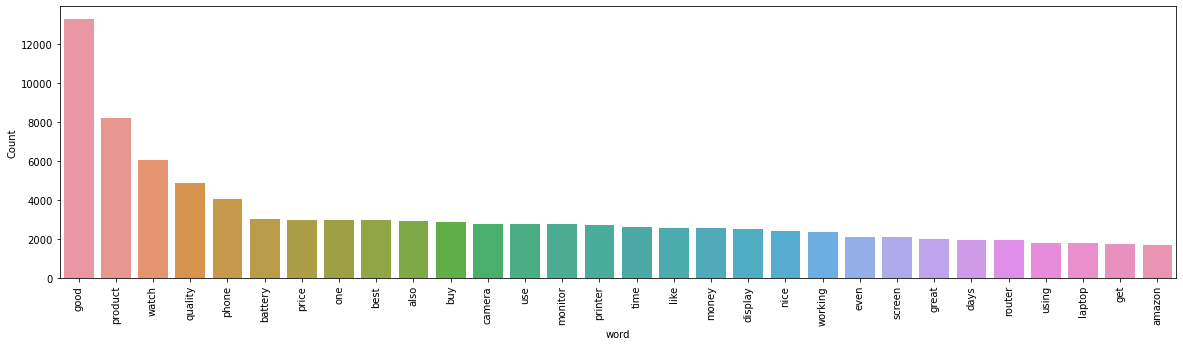

In [28]:
freq_words(df['Full_review'])

- we have printed the most accuring 20 words in our dataset.
- As we can see that the word 'good' is accuring most of the time.

### Printing Rarely Occurinng Word in Review:-

In [29]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nsmallest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

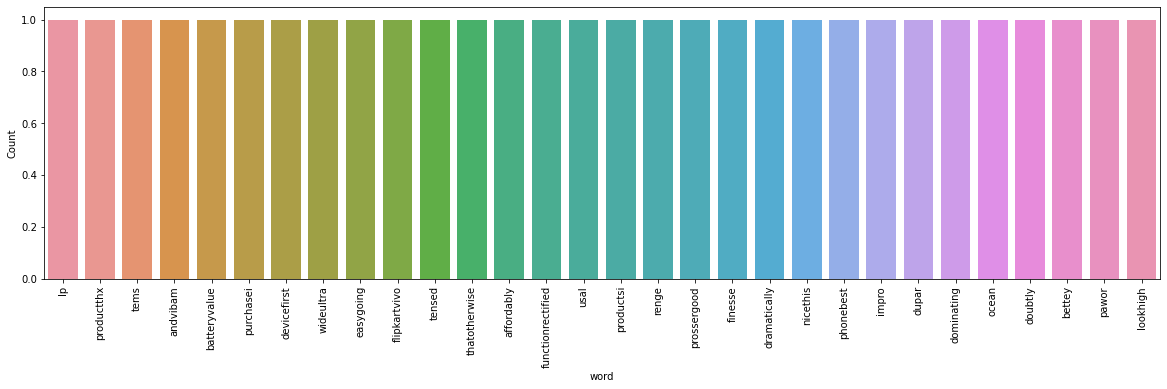

In [30]:
freq_words(df['Full_review'])

## Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [31]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemination.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Full_review'] = df['Full_review'].apply(lambda x : lemmatize_sentence(x))

In [32]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

fabulous amazing product price range good sound quality performance well update window display normal tn lead problem price range gb ram gb ssd upgrade gb gb

**********Next Review*********

nice good

**********Next Review*********

simply awesome thank flipkart thiz amaze productdelivery time perfectlaptop also amaze

**********Next Review*********

terrific purchase good

**********Next Review*********

simply awesome awesome product

**********Next Review*********

recommend heating issue

**********Next Review*********

best market good product

**********Next Review*********

classy product awesome

**********Next Review*********

terrific purchase thank u flipkart delivery

**********Next Review*********

worth money good laptop

**********Next Review*********



## Normalization:

In [33]:
## scraping noise text:
def scrap(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Full_review'] = df['Full_review'].apply(lambda x : scrap(x))

In [34]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

fabulous amazing product price range good sound quality performance well update window display normal tn lead problem price range gb ram gb ssd upgrade gb gb

**********Next Review*********

nice good

**********Next Review*********

simply awesome thank flipkart thiz amaze productdelivery time perfectlaptop also amaze

**********Next Review*********

terrific purchase good

**********Next Review*********

simply awesome awesome product

**********Next Review*********

recommend heating issue

**********Next Review*********

best market good product

**********Next Review*********

classy product awesome

**********Next Review*********

terrific purchase thank u flipkart delivery

**********Next Review*********

worth money good laptop

**********Next Review*********



### Counting the Words in 'Full_review':

In [35]:
# Creating column for word counts in the review text
df['new_review'] = df['Full_review'].apply(lambda x: len(str(x).split(' ')))
df

,Ratings,Review_Text,Summary,Full_review,new_review
0,5,"Amazing product in price range , good sound qu...",Fabulous!,fabulous amazing product price range good soun...,26
1,3,Good,Nice,nice good,2
2,5,Thank you flipkart for thiz amazing product..d...,Simply awesome,simply awesome thank flipkart thiz amaze produ...,11
3,5,Good,Terrific purchase,terrific purchase good,3
4,5,Awesome Product.,Simply awesome,simply awesome awesome product,4
...,...,...,...,...,...
17192,5,The camera is really budjet friendly\nThe qual...,Amazon delivered this product just in one day ...,amazon deliver product one day delivery within...,23
17193,5,"Price, video quality is best in budget company...",Nice product,nice product price video quality best budget c...,9
17194,5,Value for money product. Very good stabilizati...,Smooth ... Feel standard,smooth feel standard value money product good ...,13
17195,5,Play Video\n Pro's:\n1. Good clarity consideri...,Osm,osm play video pro good clarity consider price...,16


## Visualization:-

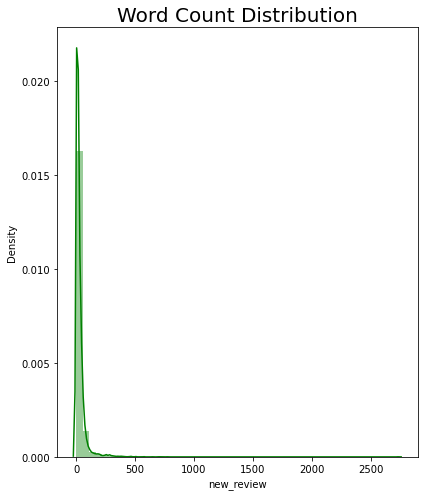

In [36]:
### Let's visulaize our word count first:
plt.figure(figsize=(6,7))
sns.distplot(df['new_review'], kde=True,color='green')
plt.title('Word Count Distribution',fontsize=20)
plt.tight_layout()

- As we can see that most of the words are accuring 0 to 20 times range.
- Word counts is highly right skewed.

#### Character count in Review:

In [37]:
df['Review_character_count'] = df['Full_review'].str.len()
df

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,"Amazing product in price range , good sound qu...",Fabulous!,fabulous amazing product price range good soun...,26,157
1,3,Good,Nice,nice good,2,9
2,5,Thank you flipkart for thiz amazing product..d...,Simply awesome,simply awesome thank flipkart thiz amaze produ...,11,86
3,5,Good,Terrific purchase,terrific purchase good,3,22
4,5,Awesome Product.,Simply awesome,simply awesome awesome product,4,30
...,...,...,...,...,...,...
17192,5,The camera is really budjet friendly\nThe qual...,Amazon delivered this product just in one day ...,amazon deliver product one day delivery within...,23,160
17193,5,"Price, video quality is best in budget company...",Nice product,nice product price video quality best budget c...,9,60
17194,5,Value for money product. Very good stabilizati...,Smooth ... Feel standard,smooth feel standard value money product good ...,13,90
17195,5,Play Video\n Pro's:\n1. Good clarity consideri...,Osm,osm play video pro good clarity consider price...,16,96


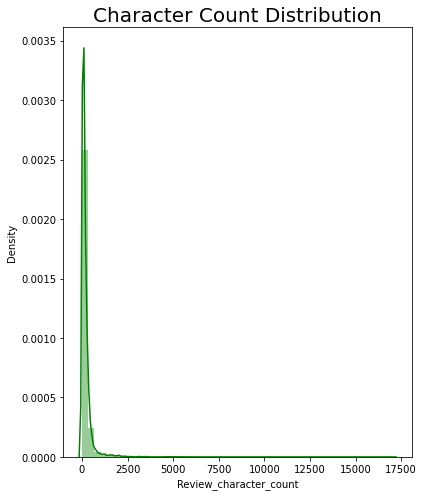

In [38]:
### Let's visulaize our character count first:
plt.figure(figsize=(6,7))
sns.distplot(df['Review_character_count'], kde=True,color='green')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

## Handling Outliers Using Zscore:-

In [39]:
from scipy import stats
from scipy.stats import zscore

In [40]:
z_score=zscore(df[['new_review']])
abs_zscore=np.abs(z_score)

In [41]:
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=df[new_entry]
print("The shape before: ", df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (16923, 6)
The shape after:  (16662, 6)


### Checking Our Target variable is Balanced or not??

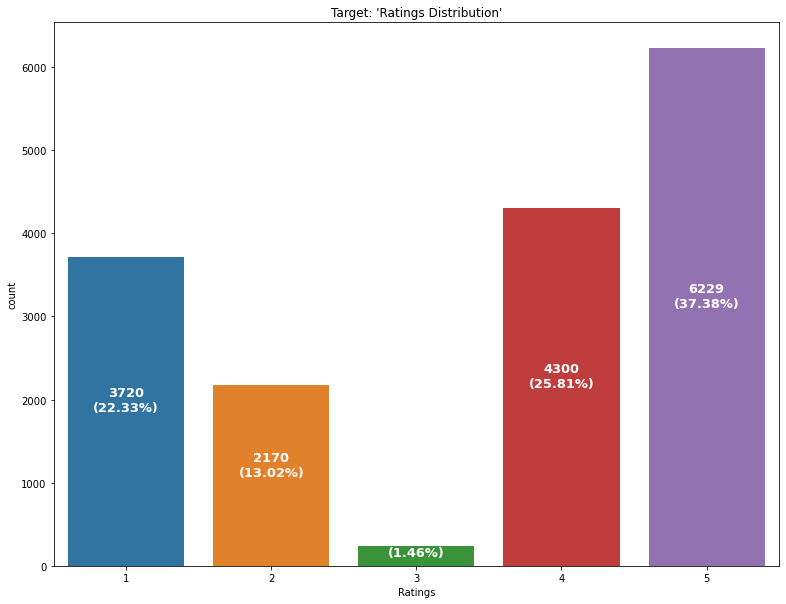

In [42]:
fig, ax = plt.subplots(1,1,figsize=(13,10))
sns.countplot(x='Ratings',data=df_new,ax=ax)
count=0
for i in ax.patches:
    x = i.get_height()/2
    height = i.get_height()
    ratio = round(height*100/len(df_new),2)
    prn = f"{height}\n({ratio}%)"
    ax.text(count,x,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    count += 1
    
plt.title("Target: 'Ratings Distribution'")
plt.show()

- As we can see that 5 Star rating received by most of the customers.
- However we see a high 4 star rating as well compared to 1 and 2 star rating reviews.
- But the count of 2 star and 3 star ratings received from customers is very low. so we have to handle it accordingly.

5    6229
4    4300
1    3720
2    2170
3     243
Name: Ratings, dtype: int64


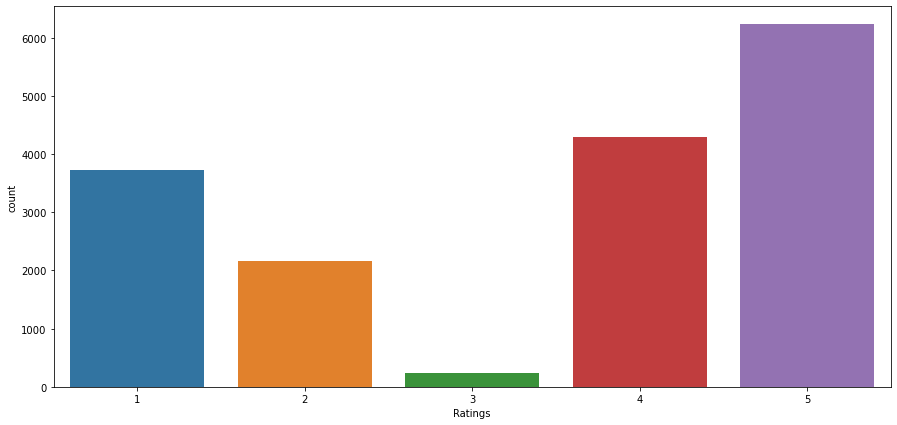

In [43]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df_new['Ratings'])
print(df_new.Ratings.value_counts())
plt.show()

- If we failed to handle this problem then the model will become a disaster because modeling using class-imbalanced data is biased in favor of the majority class.
- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star and 3 star.
- Which will cause the Imbalance problem for our Machine Learning model and make it bias.So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart).Then I will select equal number of data of every category and ensure that the rating values are balanced.

### Checking review word count distribution for each rating:-

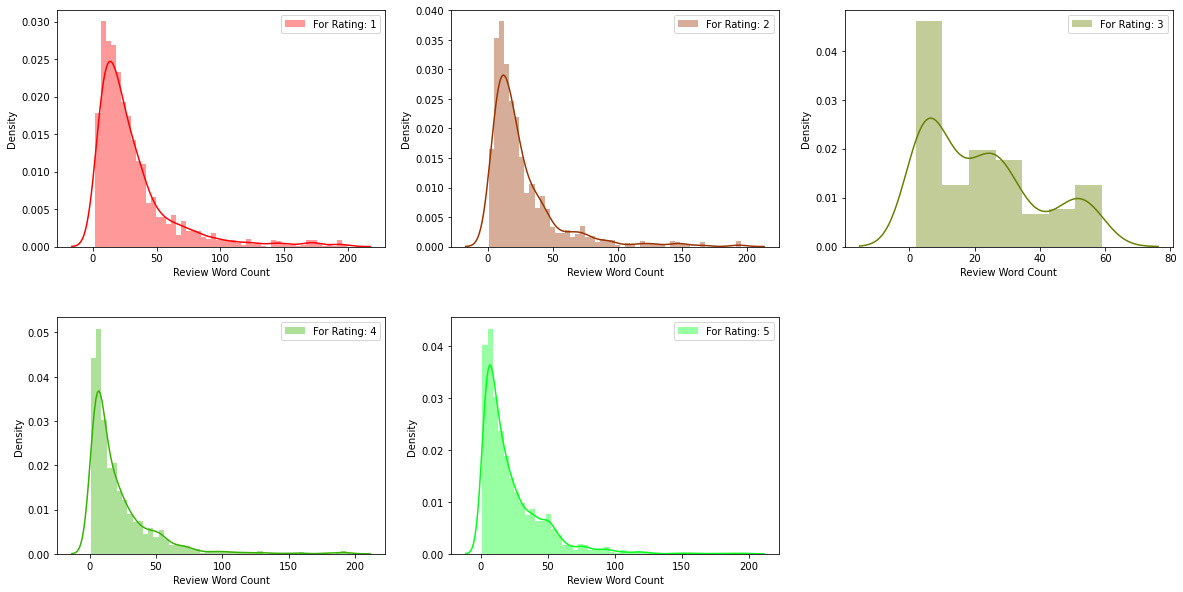

In [44]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
count = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.new_review[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    count += 1
    
plt.show()

- We noticed that every type of ratings word count distribution is highly right skewed.
- Also we see that most of the word count falling in the range of 0 to 10.

### Similarly Checking review character count distribution for each rating:-

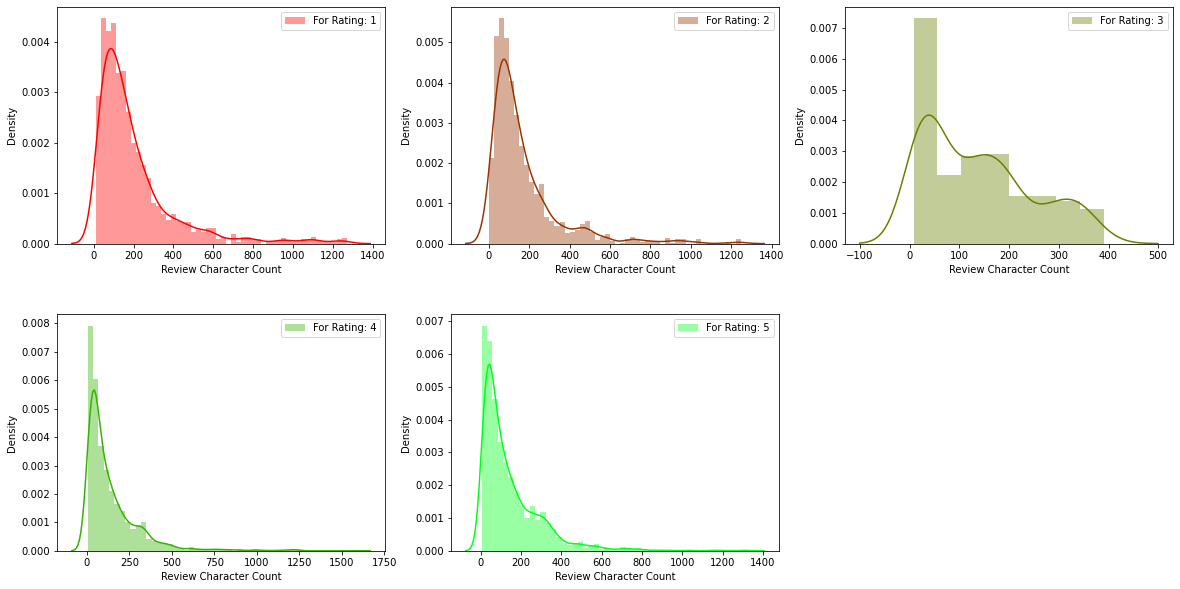

In [45]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
count=1
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.Review_character_count[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    count += 1
    
plt.show()

- We noticed that for every type rating, the character count distribution is highly right skewed.
- Similarly most of character's count is falling in the range of 0 to 10.

### Checking Word cloud by Rating:

In [46]:
from wordcloud import WordCloud

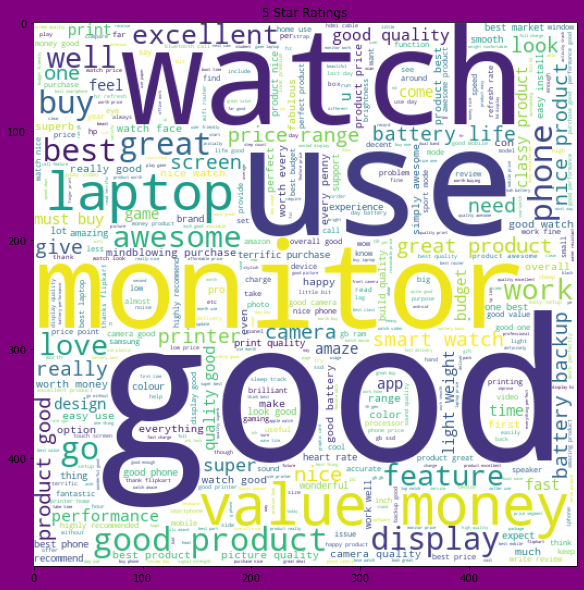

In [47]:
# 5 Star rating
star =df_new['Full_review'][df_new['Ratings']==5]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('5 Star Ratings')
plt.show()

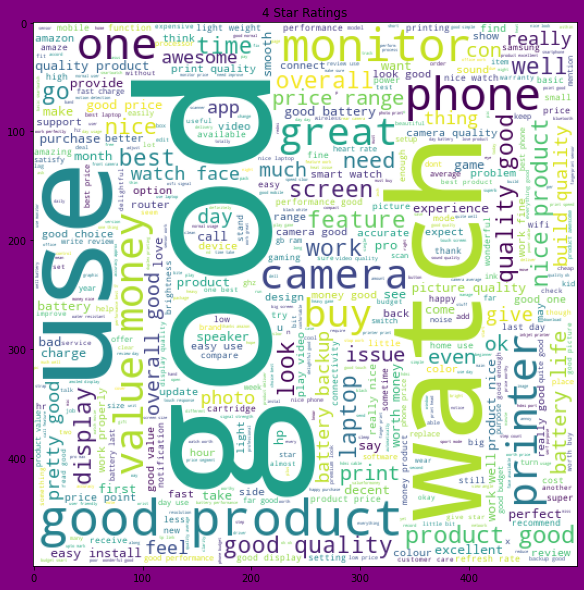

In [48]:
# 4 Star rating
star =df_new['Full_review'][df_new['Ratings']==4]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('4 Star Ratings')
plt.show()

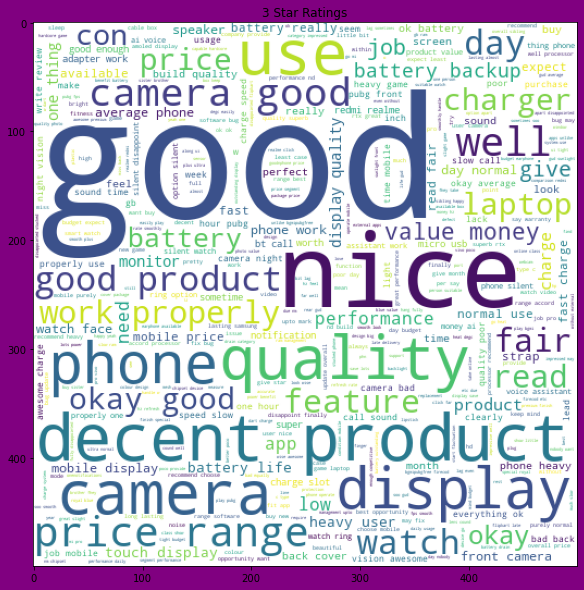

In [49]:
# 3 Star rating
star =df_new['Full_review'][df_new['Ratings']==3]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('3 Star Ratings')
plt.show()

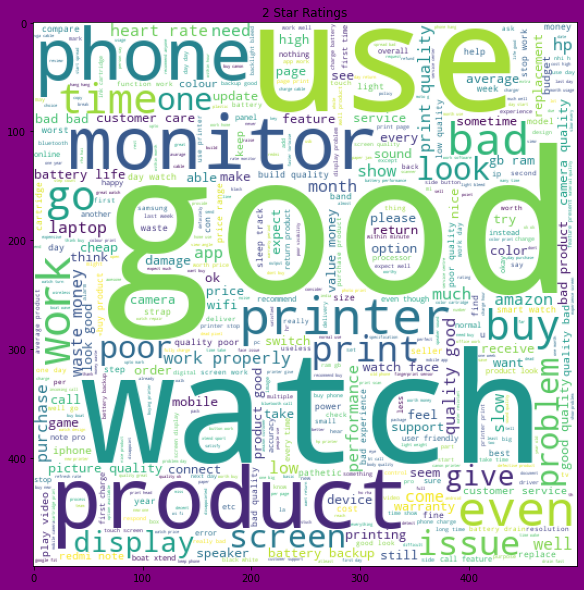

In [50]:
# 2 Star rating
star =df_new['Full_review'][df_new['Ratings']==2]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('2 Star Ratings')
plt.show()

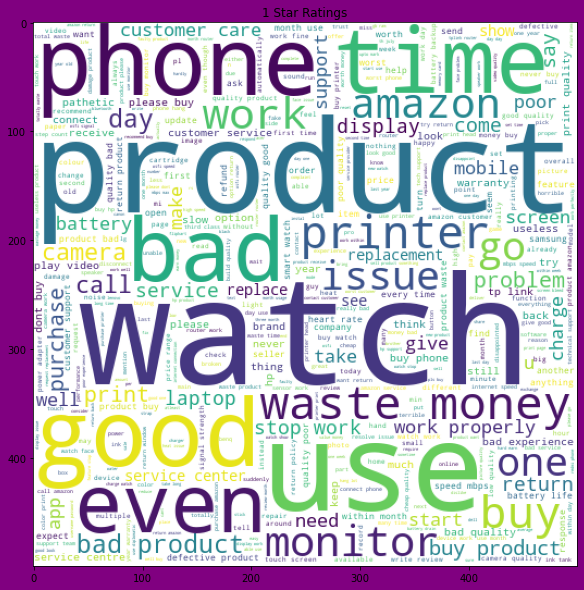

In [51]:
# 1 Star rating
star =df_new['Full_review'][df_new['Ratings']==1]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('1 Star Ratings')
plt.show()

Observation of Word Cloud Visualization:-
    
- For Rating: 1 It mostly consists of words like watch, use, quality, product, waste, poor, money, worthless, terrible product etc

- For Rating: 2 It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

- For Rating: 3 It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

- For Rating: 4 It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

- For Rating: 5 It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

## Model Building Phase:

In [52]:
# spliting the dataset:-
x=df_new['Full_review']
y=df_new['Ratings']

### Handling Imbalanced dataset:

In [53]:
### Value Counts
df_new['Ratings'].value_counts()

5    6229
4    4300
1    3720
2    2170
3     243
Name: Ratings, dtype: int64

If we take 1500 records for every star then our model will not look as imbalanced dataset.

In [54]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:1500]
df2 = df[df['Ratings']==2][0:1500]
df3 = df[df['Ratings']==3][0:1500]
df4 = df[df['Ratings']==4][0:1500]
df5 = df[df['Ratings']==5][0:1500]

In [55]:
### Adding all the dataframes:
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [56]:
df.Ratings.value_counts()

1    1500
2    1500
4    1500
5    1500
3     243
Name: Ratings, dtype: int64

In [57]:
df.isna().sum()

Ratings                   0
Review_Text               0
Summary                   0
Full_review               0
new_review                0
Review_character_count    0
dtype: int64

In [58]:
# Importing necessary libraries:-
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [59]:
df_new

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,"Amazing product in price range , good sound qu...",Fabulous!,fabulous amazing product price range good soun...,26,157
1,3,Good,Nice,nice good,2,9
2,5,Thank you flipkart for thiz amazing product..d...,Simply awesome,simply awesome thank flipkart thiz amaze produ...,11,86
3,5,Good,Terrific purchase,terrific purchase good,3,22
4,5,Awesome Product.,Simply awesome,simply awesome awesome product,4,30
...,...,...,...,...,...,...
17192,5,The camera is really budjet friendly\nThe qual...,Amazon delivered this product just in one day ...,amazon deliver product one day delivery within...,23,160
17193,5,"Price, video quality is best in budget company...",Nice product,nice product price video quality best budget c...,9,60
17194,5,Value for money product. Very good stabilizati...,Smooth ... Feel standard,smooth feel standard value money product good ...,13,90
17195,5,Play Video\n Pro's:\n1. Good clarity consideri...,Osm,osm play video pro good clarity consider price...,16,96


In [60]:
# first converting the reveiw feature
vector = TfidfVectorizer(max_features=100000,smooth_idf=False, stop_words='english')

In [61]:
x = vector.fit_transform(df_new['Full_review'])
x

<16662x11612 sparse matrix of type '<class 'numpy.float64'>'
	with 302194 stored elements in Compressed Sparse Row format>

In [62]:
y.head()

0    5
1    3
2    5
3    5
4    5
Name: Ratings, dtype: int64

In [63]:
### printing the training the testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (11663, 11612)
x_test (4999, 11612)
y_train (11663,)
y_test (4999,)


### Defining a Function for best random State:

In [64]:
# importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [65]:
### Best Random STATE:
def Random_state(Model,Feature,Target):
    maximum_accu=0
    for i in range(11,36):
        x_train,x_test,y_train,y_test=train_test_split(Feature,Target,test_size=0.25,random_state=i)
        Model.fit(Feature,Target)
        train_pred=Model.predict(x_train)
        test_pred=Model.predict(x_test)
        accu_score=accuracy_score(y_test,test_pred)
        print("For Random State {}, the Accuracy Score is: {}".format(i,accu_score))
        if accu_score>maximum_accu:
            
            maximum_accu=accu_score
            j=i
    print("\n")        
    print(" The Highest Accuracy SCORE is: {}".format(maximum_accu))
    print("\n The Best Random State is:")
    return j

### Defining a Function for Priting Accuracy:

In [66]:
def print_score(clf,x,y,randomstate,train=True):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=randomstate)
    clf.fit(x_train,y_train)
    if train:
        y_pred= clf.predict(x_train)
        print("\n**********************************Training Score****************************************")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        print("\n *********************************Confusion Matrix**************************************")
        print(confusion_matrix(y_train,y_pred))
        
        print("\n \n Training Classification Report \n" ,classification_report(y_train,y_pred,digits=2))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n \n')
        print("\n*********************************Test Result**********************************************")
        print(f"Accuracy_Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n*********************************Confusion Matrix*****************************************")
        print(confusion_matrix(y_test,pred))
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

### Defining A funtion for cross Validation:

In [67]:
def cross_val(Model,independent,dependent,randomstate):
    x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.2,random_state=randomstate)
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    for i in range(3,4):
        cv_score=cross_val_score(Model,x,y,cv=i)
        cv_mean=cv_score.mean()
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_mean)
        print('Accuracy score is :- ',accuracy_score(y_test,pred))
        print('\n')

## 1. Logistic Regression

In [68]:
## random State
Random_state(LogisticRegression(),x,y)

For Random State 11, the Accuracy Score is: 0.886701872299568
For Random State 12, the Accuracy Score is: 0.8754200672107537
For Random State 13, the Accuracy Score is: 0.8792606817090735
For Random State 14, the Accuracy Score is: 0.8775804128660586
For Random State 15, the Accuracy Score is: 0.8751800288046088
For Random State 16, the Accuracy Score is: 0.884301488238118
For Random State 17, the Accuracy Score is: 0.8816610657705233
For Random State 18, the Accuracy Score is: 0.8838214114258282
For Random State 19, the Accuracy Score is: 0.8768602976476236
For Random State 20, the Accuracy Score is: 0.8840614498319731
For Random State 21, the Accuracy Score is: 0.8785405664906385
For Random State 22, the Accuracy Score is: 0.8847815650504081
For Random State 23, the Accuracy Score is: 0.8826212193951032
For Random State 24, the Accuracy Score is: 0.8785405664906385
For Random State 25, the Accuracy Score is: 0.8833413346135381
For Random State 26, the Accuracy Score is: 0.87542006721

11

In [69]:
print_score(LogisticRegression(),x,y,11,train=True)
print_score(LogisticRegression(),x,y,11,train=False)


**********************************Training Score****************************************
Accuracy Score : 87.15%

 *********************************Confusion Matrix**************************************
[[2871   62    0   40   20]
 [ 238 1348    0  115   54]
 [   7   11   73   71   27]
 [  74   41    6 2748  557]
 [  49   12    0  329 4576]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.89      0.96      0.92      2993
           2       0.91      0.77      0.83      1755
           3       0.92      0.39      0.54       189
           4       0.83      0.80      0.82      3426
           5       0.87      0.92      0.90      4966

    accuracy                           0.87     13329
   macro avg       0.89      0.77      0.80     13329
weighted avg       0.87      0.87      0.87     13329


 


*********************************Test Result**********************************************
Accuracy_Score : 80.86%

********

### Cross Validation:

In [70]:
cross_val(LogisticRegression(),x,y,11)

At cv :-  3
Cross Validation score is :-  0.5667987036370185
Accuracy score is :-  0.8085808580858086




## 2. Decision Tree Classifier

In [71]:
## random State
Random_state(DecisionTreeClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.9920787325972156
For Random State 12, the Accuracy Score is: 0.9925588094095055
For Random State 13, the Accuracy Score is: 0.9901584253480556
For Random State 14, the Accuracy Score is: 0.9913586173787806
For Random State 15, the Accuracy Score is: 0.9915986557849256
For Random State 16, the Accuracy Score is: 0.9923187710033605
For Random State 17, the Accuracy Score is: 0.9913586173787806
For Random State 18, the Accuracy Score is: 0.9923187710033605
For Random State 19, the Accuracy Score is: 0.9884781565050408
For Random State 20, the Accuracy Score is: 0.9935189630340855
For Random State 21, the Accuracy Score is: 0.9889582333173308
For Random State 22, the Accuracy Score is: 0.9901584253480556
For Random State 23, the Accuracy Score is: 0.9903984637542007
For Random State 24, the Accuracy Score is: 0.9918386941910706
For Random State 25, the Accuracy Score is: 0.9915986557849256
For Random State 26, the Accuracy Score is: 0.989918386

20

In [72]:
### printing the scores:
print_score(DecisionTreeClassifier(),x,y,20,train=True)
print_score(DecisionTreeClassifier(),x,y,20,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.06%

 *********************************Confusion Matrix**************************************
[[3002    1    0    0    0]
 [   0 1739    0    8    0]
 [   0    0  187    0    0]
 [   0    0   12 3428   13]
 [   1    3    7   80 4848]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3003
           2       1.00      1.00      1.00      1747
           3       0.91      1.00      0.95       187
           4       0.97      0.99      0.98      3453
           5       1.00      0.98      0.99      4939

    accuracy                           0.99     13329
   macro avg       0.98      0.99      0.98     13329
weighted avg       0.99      0.99      0.99     13329


 


*********************************Test Result**********************************************
Accuracy_Score : 83.59%

********

### Cross Validation: 

In [73]:
cross_val(DecisionTreeClassifier(),x,y,20)

At cv :-  3
Cross Validation score is :-  0.5031808906493819
Accuracy score is :-  0.8355835583558355




## 3. RandomForest Classifier

In [74]:
## random State
Random_state(RandomForestClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.9913586173787806
For Random State 12, the Accuracy Score is: 0.9918386941910706
For Random State 13, the Accuracy Score is: 0.9896783485357658
For Random State 14, the Accuracy Score is: 0.9911185789726357
For Random State 15, the Accuracy Score is: 0.9913586173787806
For Random State 16, the Accuracy Score is: 0.9918386941910706
For Random State 17, the Accuracy Score is: 0.9915986557849256
For Random State 18, the Accuracy Score is: 0.9918386941910706
For Random State 19, the Accuracy Score is: 0.9882381180988958
For Random State 20, the Accuracy Score is: 0.9937590014402304
For Random State 21, the Accuracy Score is: 0.9889582333173308
For Random State 22, the Accuracy Score is: 0.9908785405664906
For Random State 23, the Accuracy Score is: 0.9908785405664906
For Random State 24, the Accuracy Score is: 0.9923187710033605
For Random State 25, the Accuracy Score is: 0.9915986557849256
For Random State 26, the Accuracy Score is: 0.990878540

20

In [75]:
### printing the scores:
print_score(RandomForestClassifier(),x,y,20,train=True)
print_score(RandomForestClassifier(),x,y,20,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.06%

 *********************************Confusion Matrix**************************************
[[3001    1    0    0    1]
 [   0 1738    0    8    1]
 [   0    0  187    0    0]
 [   0    0   12 3421   20]
 [   0    2    7   73 4857]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3003
           2       1.00      0.99      1.00      1747
           3       0.91      1.00      0.95       187
           4       0.98      0.99      0.98      3453
           5       1.00      0.98      0.99      4939

    accuracy                           0.99     13329
   macro avg       0.98      0.99      0.98     13329
weighted avg       0.99      0.99      0.99     13329


 


*********************************Test Result**********************************************
Accuracy_Score : 90.58%

********

### Cross Validation: 

In [76]:
cross_val(RandomForestClassifier(),x,y,20)

At cv :-  3
Cross Validation score is :-  0.5894850558156284
Accuracy score is :-  0.9000900090009001




## 4. AdaBoost Classifier

In [77]:
## random State
Random_state(AdaBoostClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.4932789246279405
For Random State 12, the Accuracy Score is: 0.49087854056649066
For Random State 13, the Accuracy Score is: 0.4865578492558809
For Random State 14, the Accuracy Score is: 0.48607777244359096
For Random State 15, the Accuracy Score is: 0.49495919347095535
For Random State 16, the Accuracy Score is: 0.4990398463754201
For Random State 17, the Accuracy Score is: 0.4956793086893903
For Random State 18, the Accuracy Score is: 0.49807969275084013
For Random State 19, the Accuracy Score is: 0.4913586173787806
For Random State 20, the Accuracy Score is: 0.49495919347095535
For Random State 21, the Accuracy Score is: 0.48943831012962075
For Random State 22, the Accuracy Score is: 0.49615938550168026
For Random State 23, the Accuracy Score is: 0.4901584253480557
For Random State 24, the Accuracy Score is: 0.49183869419107057
For Random State 25, the Accuracy Score is: 0.49159865578492556
For Random State 26, the Accuracy Score is: 0.

27

In [78]:
### printing the scores:
print_score(AdaBoostClassifier(),x,y,27,train=True)
print_score(AdaBoostClassifier(),x,y,27,train=False)


**********************************Training Score****************************************
Accuracy Score : 49.42%

 *********************************Confusion Matrix**************************************
[[2431   68    0  203  261]
 [1051  111    3  335  272]
 [   0    8   61   72   57]
 [ 694   40   43 1405 1239]
 [1021   67   24 1284 2579]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.47      0.82      0.60      2963
           2       0.38      0.06      0.11      1772
           3       0.47      0.31      0.37       198
           4       0.43      0.41      0.42      3421
           5       0.59      0.52      0.55      4975

    accuracy                           0.49     13329
   macro avg       0.46      0.42      0.41     13329
weighted avg       0.49      0.49      0.46     13329


 


*********************************Test Result**********************************************
Accuracy_Score : 50.32%

********

### Cross Validation: 

In [79]:
cross_val(AdaBoostClassifier(),x,y,27)

At cv :-  3
Cross Validation score is :-  0.4408834473652623
Accuracy score is :-  0.5031503150315032




## 5. Gradient Boosting Classifier

In [80]:
## random State
Random_state(GradientBoostingClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.7498799807969275
For Random State 12, the Accuracy Score is: 0.7469995199231877
For Random State 13, the Accuracy Score is: 0.7438790206433029
For Random State 14, the Accuracy Score is: 0.742918867018723
For Random State 15, the Accuracy Score is: 0.742198751800288
For Random State 16, the Accuracy Score is: 0.7573211713874219
For Random State 17, the Accuracy Score is: 0.7530004800768123
For Random State 18, the Accuracy Score is: 0.7414786365818531
For Random State 19, the Accuracy Score is: 0.7419587133941431
For Random State 20, the Accuracy Score is: 0.7561209793566971
For Random State 21, the Accuracy Score is: 0.7462794047047527
For Random State 22, the Accuracy Score is: 0.742438790206433
For Random State 23, the Accuracy Score is: 0.7527604416706674
For Random State 24, the Accuracy Score is: 0.7520403264522324
For Random State 25, the Accuracy Score is: 0.7455592894863178
For Random State 26, the Accuracy Score is: 0.749399903984

16

In [81]:
### printing the scores:
print_score(GradientBoostingClassifier(),x,y,16,train=True)
print_score(GradientBoostingClassifier(),x,y,16,train=False)


**********************************Training Score****************************************
Accuracy Score : 75.29%

 *********************************Confusion Matrix**************************************
[[2735   41    2  143   47]
 [ 587  723    0  311  104]
 [   0    0  188    3    0]
 [ 217   27   11 2281  900]
 [ 184   11    8  697 4109]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.73      0.92      0.82      2968
           2       0.90      0.42      0.57      1725
           3       0.90      0.98      0.94       191
           4       0.66      0.66      0.66      3436
           5       0.80      0.82      0.81      5009

    accuracy                           0.75     13329
   macro avg       0.80      0.76      0.76     13329
weighted avg       0.76      0.75      0.74     13329


 


*********************************Test Result**********************************************
Accuracy_Score : 71.62%

********

### Cross Validation:

In [82]:
cross_val(GradientBoostingClassifier(),x,y,16)

At cv :-  3
Cross Validation score is :-  0.5609770735806027
Accuracy score is :-  0.7137713771377138




## 6. ExtraTree Classifier

In [83]:
## random State
Random_state(ExtraTreesClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.9920787325972156
For Random State 12, the Accuracy Score is: 0.9925588094095055
For Random State 13, the Accuracy Score is: 0.9901584253480556
For Random State 14, the Accuracy Score is: 0.9913586173787806
For Random State 15, the Accuracy Score is: 0.9915986557849256
For Random State 16, the Accuracy Score is: 0.9923187710033605
For Random State 17, the Accuracy Score is: 0.9913586173787806
For Random State 18, the Accuracy Score is: 0.9923187710033605
For Random State 19, the Accuracy Score is: 0.9884781565050408
For Random State 20, the Accuracy Score is: 0.9935189630340855
For Random State 21, the Accuracy Score is: 0.9889582333173308
For Random State 22, the Accuracy Score is: 0.9901584253480556
For Random State 23, the Accuracy Score is: 0.9903984637542007
For Random State 24, the Accuracy Score is: 0.9918386941910706
For Random State 25, the Accuracy Score is: 0.9915986557849256
For Random State 26, the Accuracy Score is: 0.989918386

20

In [84]:
### printing the scores:
print_score(ExtraTreesClassifier(),x,y,20,train=True)
print_score(ExtraTreesClassifier(),x,y,20,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.06%

 *********************************Confusion Matrix**************************************
[[3002    1    0    0    0]
 [   0 1739    0    8    0]
 [   0    0  187    0    0]
 [   0    0   12 3428   13]
 [   1    3    7   80 4848]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3003
           2       1.00      1.00      1.00      1747
           3       0.91      1.00      0.95       187
           4       0.97      0.99      0.98      3453
           5       1.00      0.98      0.99      4939

    accuracy                           0.99     13329
   macro avg       0.98      0.99      0.98     13329
weighted avg       0.99      0.99      0.99     13329


 


*********************************Test Result**********************************************
Accuracy_Score : 92.05%

********

### Cross Validation:

In [85]:
cross_val(ExtraTreesClassifier(),x,y,20)

At cv :-  3
Cross Validation score is :-  0.582223022446285
Accuracy score is :-  0.9171917191719172




## 7. GaussianNB Classifier

In [86]:
## random State
Random_state(MultinomialNB(),x,y)

For Random State 11, the Accuracy Score is: 0.7534805568891022
For Random State 12, the Accuracy Score is: 0.7426788286125781
For Random State 13, the Accuracy Score is: 0.7477196351416227
For Random State 14, the Accuracy Score is: 0.7385981757081133
For Random State 15, the Accuracy Score is: 0.7385981757081133
For Random State 16, the Accuracy Score is: 0.7479596735477676
For Random State 17, the Accuracy Score is: 0.7477196351416227
For Random State 18, the Accuracy Score is: 0.7491598655784926
For Random State 19, the Accuracy Score is: 0.7443590974555929
For Random State 20, the Accuracy Score is: 0.7597215554488718
For Random State 21, the Accuracy Score is: 0.7448391742678828
For Random State 22, the Accuracy Score is: 0.7419587133941431
For Random State 23, the Accuracy Score is: 0.7481997119539127
For Random State 24, the Accuracy Score is: 0.743158905424868
For Random State 25, the Accuracy Score is: 0.7450792126740279
For Random State 26, the Accuracy Score is: 0.7481997119

20

In [87]:
### printing the scores:
print_score(MultinomialNB(),x,y,20,train=True)
print_score(MultinomialNB(),x,y,20,train=False)


**********************************Training Score****************************************
Accuracy Score : 72.80%

 *********************************Confusion Matrix**************************************
[[2712    1    1   76  213]
 [ 580  445    0  233  489]
 [   7    0    0   39  141]
 [ 119    0    2 1706 1626]
 [  64    4    3   27 4841]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.78      0.90      0.84      3003
           2       0.99      0.25      0.41      1747
           3       0.00      0.00      0.00       187
           4       0.82      0.49      0.62      3453
           5       0.66      0.98      0.79      4939

    accuracy                           0.73     13329
   macro avg       0.65      0.53      0.53     13329
weighted avg       0.76      0.73      0.69     13329


 


*********************************Test Result**********************************************
Accuracy_Score : 69.64%

********

### Cross Validation:

In [88]:
cross_val(MultinomialNB(),x,y,20)

At cv :-  3
Cross Validation score is :-  0.5377505701596447
Accuracy score is :-  0.6963696369636964




## Conclusion:

As we noticed that every model's training score showing great as well as testing score. But after checking the Cross validation we face the reality of our models. Every model is extremely over fitted.


### After Checking the Cross Validation we observe that RandomForestClassifier models showing highest accuracy among all of them.

Now, we will do Some tunning for this model. Let's Check if we increase their accuracy or not.

## HyperParameter Tunning:


### Random Forest Classifier:-

In [89]:
 ##Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'max_depth': [500,800],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv=3, verbose=3,n_jobs=-1)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [500, 800], 'n_estimators': [100, 200]},
             verbose=3)

In [90]:
print(GSCV.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 800, 'n_estimators': 100}


In [91]:
### Model Evaluation

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=15)

rf=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=800,bootstrap=False)

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_pred))
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, y_pred)}")




***********************Testing Scores******************************

Accuracy score for testing is :  0.8934229476716274

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.89      0.96      0.92       909
           2       0.96      0.77      0.86       559
           3       0.82      0.82      0.82        55
           4       0.89      0.83      0.86      1081
           5       0.89      0.94      0.91      1562

    accuracy                           0.89      4166
   macro avg       0.89      0.87      0.87      4166
weighted avg       0.90      0.89      0.89      4166


CONFUSION MATRIX: 
 [[ 876    4    0    7   22]
 [  81  433    2   30   13]
 [   3    0   45    6    1]
 [  19    6    5  899  152]
 [  10    7    3   73 1469]]


In [92]:
import scikitplot as sktplt

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

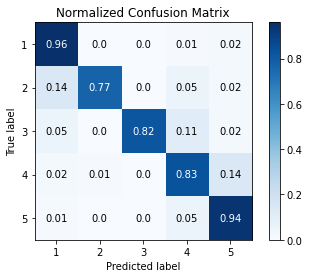

In [93]:
## Visualize the confusion matrix:
sktplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Acuracy of final model Random Forest is 89%

## Saving The model:

In [94]:
import joblib
joblib.dump(rf,"Rating_prediction.pkl")

['Rating_prediction.pkl']

## Actual Vs Predicted:

In [95]:
original=np.array(y_test)
predicted=np.array(rf.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,2,2
1,5,5
2,5,5
3,1,1
4,1,1
...,...,...
4161,1,1
4162,4,4
4163,2,1
4164,5,5
